In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt(
    './Student_Performance.csv',
    delimiter=',',
    skiprows=1,
    dtype=[
        ('Hours Studied', 'float'),
        ('Previous Scores', 'float'),
        ('Extracurricular Activities', 'U3'),
        ('Sleep Hours', 'float'),
        ('Sample Question Papers Practiced', 'float'),
        ('Performance Index', 'float'),
    ]
)

In [110]:
# Convert data for machine learning
def convert_data(raw_data):
    m = len(data)
    perf_idx = 5
    
    x_train = np.zeros((m, perf_idx))
    y_train = np.zeros(m)
    for i in range(m):
        entry = data[i]
        row = np.zeros(perf_idx)
        for j in range(perf_idx):
            val = entry[j]
            if val == 'Yes':
                val = 1
            elif val == 'No':
                val = 0
            row[j] = val
        x_train[i] = row
        y_train[i] = entry[perf_idx]
    return x_train, y_train
    
x_train, y_train = convert_data(data)

print(x_train[0:10])
print(y_train[0:10])

[[ 7. 99.  1.  9.  1.]
 [ 4. 82.  0.  4.  2.]
 [ 8. 51.  1.  7.  2.]
 [ 5. 52.  1.  5.  2.]
 [ 7. 75.  0.  8.  5.]
 [ 3. 78.  0.  9.  6.]
 [ 7. 73.  1.  5.  6.]
 [ 8. 45.  1.  4.  6.]
 [ 5. 77.  0.  8.  2.]
 [ 4. 89.  0.  4.  0.]]
[91. 65. 45. 36. 66. 61. 63. 42. 61. 69.]


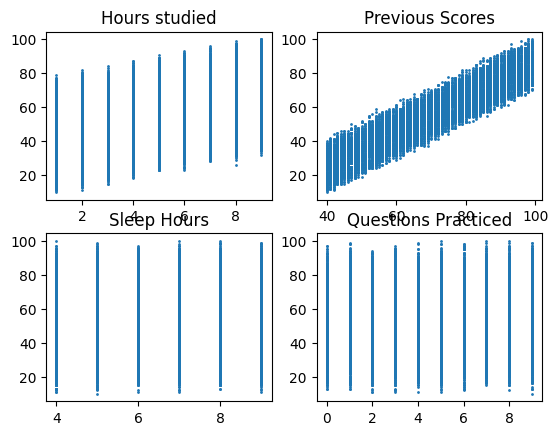

In [131]:
def visualize(X_train, y, y_comp = None):
    # X_train: training input
    # y: either prediction or target
    # y_comp: comparison set
    
    # Visualize data
    fig, axs = plt.subplots(2, 2)

    axs[0, 0].set_title('Hours studied')
    axs[0, 0].scatter(x_train[:, 0], y_train, s=1)
    if y_comp:
        axs[0, 0].scatter(x_train[:, 0], y_comp, s=1)
    
    axs[0, 1].set_title('Previous Scores')
    axs[0, 1].scatter(x_train[:, 1], y_train, s=1)
    if y_comp:
        axs[0, 1].scatter(x_train[:, 1], y_comp, s=1)
    
    axs[1, 0].set_title('Sleep Hours')
    axs[1, 0].scatter(x_train[:, 3], y_train, s=1)
    if y_comp:
        axs[1, 0].scatter(x_train[:, 3], y_comp, s=1)
    
    axs[1, 1].set_title('Questions Practiced')
    axs[1, 1].scatter(x_train[:, 4], y_train, s=1)
    if y_comp:
            axs[1, 1].scatter(x_train[:, 4], y_comp, s=1)
    
visualize(x_train, y_train)

In [39]:
# OPTIONAL: normalize data
mu = np.mean(x_train)
sigma = np.std(x_train)

x_norm = (x_train - mu)/sigma

In [41]:
# Define initial weights and biases
w = np.array(np.random.uniform(0, 20, size=5))
b = np.random.uniform(0, 20)

In [46]:
def calculate_perf_index(x, w, b):
    return np.dot(w, x) + b

# test run the function
# calculate_perf_index([ 7., 99.,  1.,  9., 1.], w, b)

In [47]:
def calculate_cost(X, y, w, b):
    cost = 0
    m = X.shape[0]
    
    for i in range(m):
        y_hat = calculate_perf_index(X[i], w, b)
        y_i = y[i]
        
        cost += (y_hat - y_i)**2
    cost /= (2*m)
    return cost

# test run cost function
# calculate_cost(X[:20], y_train[:20], w, b)

In [49]:
def calculate_gradients(X, y, w, b):
    m, n = X.shape
    
    dj_dw = np.zeros(n)
    dj_db = 0

    for i in range(m):
        y_hat = calculate_perf_index(X[i], w, b)
        y_i = y[i]

        err = y_hat - y_i # scalar
        dj_dw += err * X[i]
        dj_db += err

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

# test run gradient calculator
# calculate_gradients(X[:10], y_train[:10], w, b)

In [115]:
def train(X, y, w, b, learning_rate):
    m, n = X.shape
    num_iters = 10000

    costs = []

    for i in range(num_iters):
        dj_dw, dj_db = calculate_gradients(X, y, w, b)

        w -= learning_rate * dj_dw
        b -= learning_rate * dj_db

        cost = calculate_cost(X, y, w, b)
        costs.append(cost)

        if i % 1000 == 0:
            print('[{:d}] {:.2f}'.format(i, costs[i]))

    return costs, w, b

In [141]:
# Learning rate was chosen through experimenting with different values
# until it becomes too large (cost keeps rising)
alpha = 0.3

cost_history, w_res, b_res = train(x_norm, y_train, w, b, alpha)

[0] 368.14
[1000] 2.26
[2000] 2.21
[3000] 2.19
[4000] 2.18
[5000] 2.16
[6000] 2.15
[7000] 2.14
[8000] 2.13
[9000] 2.12


In [152]:
print(f'Weights and bias found: {w_res}, {b_res}, after, {len(cost_history)} iterations')

Weights and bias found: [78.01949198 27.9044635   0.93244086 12.78364832  5.24324549], 44.77146876400978, after, 10000 iterations


Text(0, 0.5, 'Cost')

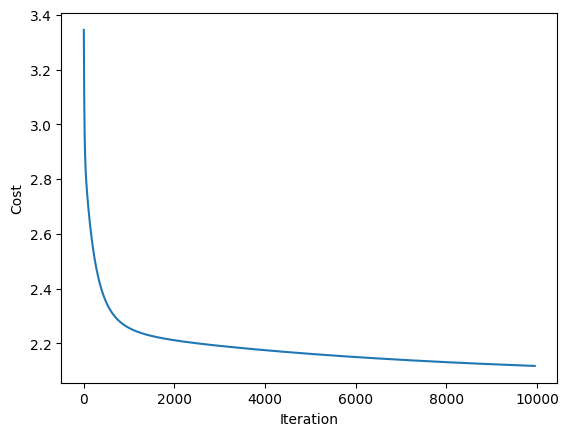

In [153]:
# visualize learning process
fig, ax = plt.subplots()
# discard the first 50 cost values since they drop very quickly
ax.plot(np.arange(len(cost_history[50:])), cost_history[50:])
ax.set_xlabel("Iteration")
ax.set_ylabel("Cost")

In [154]:
# test first few predictions

def test(X, y, w, b):
    m = X[:10].shape[0]
    for i in range(m):
        prediction = calculate_perf_index(X[i], w, b)
        target = y[i]
        print('{:.2f}  {:.2f}, {:.2f}'.format(prediction, target, abs(prediction - target)))

test(x_norm, y_train, w_res, b_res)

91.54  91.00, 0.54
63.49  65.00, 1.51
44.74  45.00, 0.26
36.27  36.00, 0.27
67.35  66.00, 1.35
59.67  61.00, 1.33
64.14  63.00, 1.14
37.99  42.00, 4.01
63.11  61.00, 2.11
70.24  69.00, 1.24


Our model is able to predict the performance index quite close to the target values, with single digit errors so far.

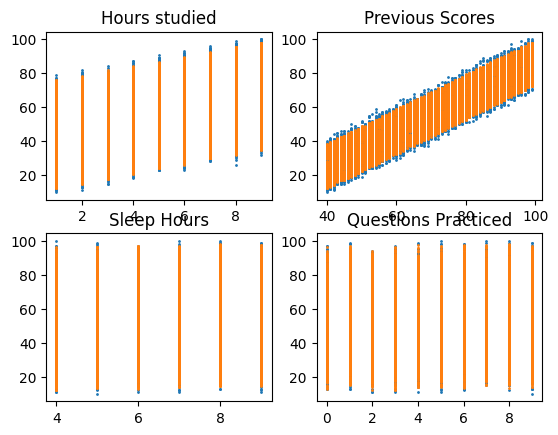

In [155]:
# Evaluate the model
m = x_train.shape[0]
y_predict = []
for i in range(m):
    y_predict.append(calculate_perf_index(x_norm[i], w_res, b_res))

visualize(x_train, y_train, y_predict)

We can see that the orange areas overlap with most of the graph of the training data. This indicates that our model is able to predict quite well so far.

In [156]:
# Scikit-Learn implementation
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
skx_norm = scaler.fit_transform(x_train)

In [157]:
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(skx_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(max_iter=10000)
number of iterations completed: 8, number of weight updates: 80001.0


In [158]:
b_norm = sgdr.intercept_[0]
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")


model parameters:                   w: [ 7.41466594 17.65160277  0.29991751  0.80960948  0.59434107], b:55.23050947963995


In [159]:
# test first few predictions
test(skx_norm, y_train, w_norm, b_norm)

91.80  91.00, 0.80
63.12  65.00, 1.88
45.06  45.00, 0.06
36.53  36.00, 0.53
67.12  66.00, 1.12
59.41  61.00, 1.59
64.46  63.00, 1.46
38.35  42.00, 3.65
62.81  61.00, 1.81
69.84  69.00, 0.84


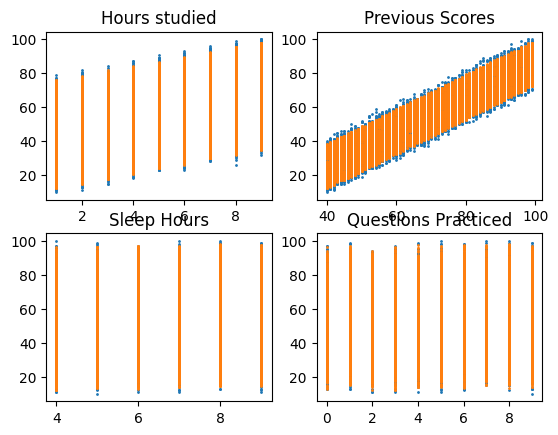

In [160]:
# Evaluate the model
m = x_train.shape[0]
y_predict_sgdr = []
for i in range(m):
    y_predict_sgdr.append(calculate_perf_index(x_norm[i], w_res, b_res))

visualize(x_train, y_train, y_predict_sgdr)

In [161]:
print('Mean and SD of our implementation: {:.2f}  {:.2f}'.format(np.mean(y_predict), np.std(y_predict)))
print('Mean and SD of Scikit-Learn implementation: {:.2f}  {:.2f}'.format(np.mean(y_predict_sgdr), np.std(y_predict_sgdr)))

Mean and SD of our implementation: 55.22  19.10
Mean and SD of Scikit-Learn implementation: 55.22  19.10


Our model and Scikit-learn's model have the same mean and standard deviation. But Scikit-learn runs much faster (instant result vs. couple of minutes)